# MAME DIARRA TOURE ENSIIE M2QF

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from sklearn import mixture
from scipy.stats import norm
import math
import statistics as stat
import random as rd
from numpy import quantile, where , random
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn import datasets
from sklearn.ensemble import IsolationForest
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from sklearn import mixture
from scipy.stats import norm
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import decomposition
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import seaborn as sb
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
sb.set(font_scale=1.2,style="whitegrid")

# Exercice 1

In [38]:
import pandas as pd
tab=pd.read_csv('cluster1.txt',sep=';',header=None)
X=np.array(tab);


Text(0, 0.5, 'y')

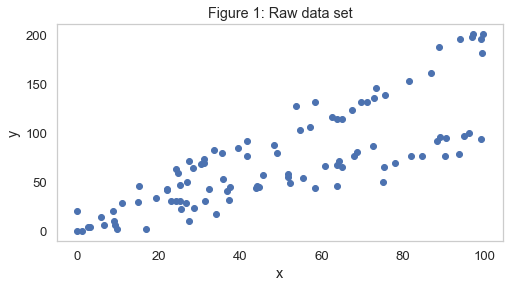

In [39]:
#displaying the data 
figure=plt.figure(figsize=(8,4));
ax=plt.subplot(1,1,1);
ax.scatter(X[:,0],X[:,1])
plt.grid()
ax.set_title('Figure 1: Raw data set')
ax.set_xlabel('x')
ax.set_ylabel('y')

# II. A Clustering prepocessed data

## Question A1

In [40]:
#PCA on raw data

#First I center the columns 

X_centered= X - np.mean(X , axis = 0)
pca = PCA(n_components = 2).fit(X_centered)

In [41]:
pca.components_

array([[ 0.45371116,  0.8911488 ],
       [ 0.8911488 , -0.45371116]])

In [42]:
tab1=np.zeros((100,2))#en prenant un seul eigen vector
#projection on the first axis
for i in range( 100):
    tab1[i,:]= np.mean(X , axis = 0)+np.vdot(X_centered[i,:],pca.components_[0])*pca.components_[0]

#projection on the second axis
tab2=np.zeros((100,2))
for i in range( 100):
    tab2[i,:]= np.mean(X, axis = 0)+np.vdot(X_centered[i,:],pca.components_[1])*pca.components_[1]

#projection on both axis
tab3=np.zeros((100,2))
for i in range( 100):
    tab3[i,:]= np.mean(X , axis = 0)+np.vdot(X_centered[i,:],pca.components_[0])*pca.components_[0]+np.vdot(X_centered[i,:],pca.components_[1])*pca.components_[1]




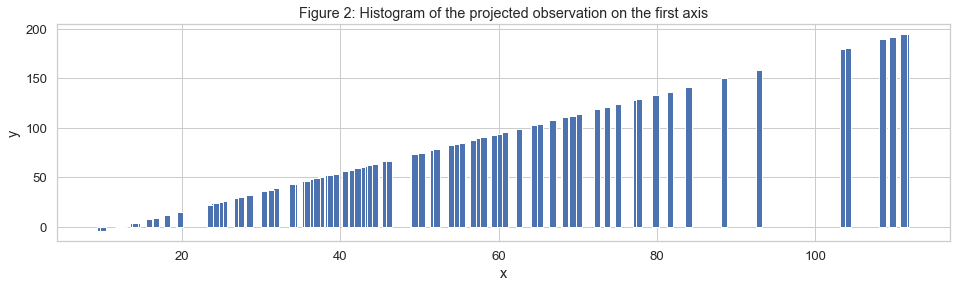

In [43]:
figure=plt.figure(figsize=(16,4));
ax=plt.subplot(1,1,1)
ax.bar(tab1[:,0],tab1[:,1])
plt.grid()
ax.set_title('Figure 2: Histogram of the projected observation on the first axis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid()




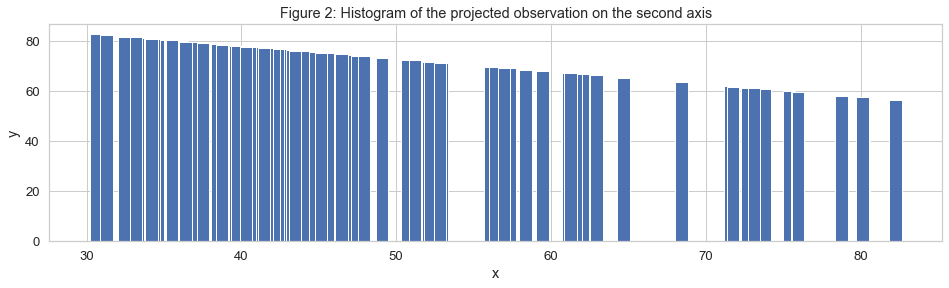

In [44]:
figure=plt.figure(figsize=(16,4));
ax=plt.subplot(1,1,1)
ax.bar(tab2[:,0],tab2[:,1])
plt.grid()
ax.set_title('Figure 2: Histogram of the projected observation on the second axis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid()


In [45]:
#figure=plt.figure(figsize=(16,4));
#ax=plt.subplot(1,1,1)
#ax.bar(tab3[:,0],tab3[:,1])
#plt.grid()
#ax.set_title('Figure 2: Histogram of the projected observation on both axis')
#ax.set_xlabel('x')
#ax.set_ylabel('y')
#ax.grid()

### According to the previous histogram i would say that the axis on which the clustering task seems to be easier is the second axis, Indeed it seems like the projection of our observations on that axis shows a more defined separation of the two tendences that compose our dataset

## Question A3-a
I used the following GMM model with two components( two clusters) and with a full covariance matrix

In [46]:
from sklearn import mixture
X2=tab2
modgmm=mixture.GaussianMixture(n_components=2, covariance_type='full');
fitgmm=modgmm.fit(X2);

predX=fitgmm.fit_predict(X2);

In [47]:
print('the means of the model is ',fitgmm.means_)
print('the weight  of each class is',fitgmm.weights_)
print('the covariances between the classes are ',fitgmm.covariances_)

the means of the model is  [[40.10012397 77.96411477]
 [63.37505505 66.11413434]]
the weight  of each class is [0.59854844 0.40145156]
the covariances between the classes are  [[[ 24.03374483 -12.23631526]
  [-12.23631526   6.22988396]]

 [[109.86392986 -55.93509186]
  [-55.93509186  28.47826983]]]


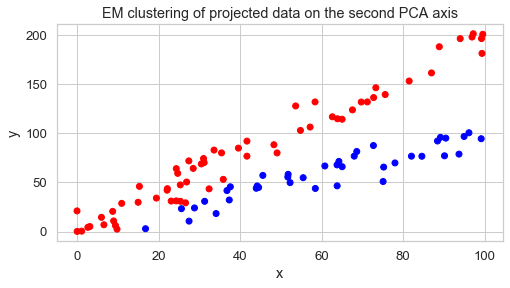

In [48]:
color = ['blue' if y==1 else 'red' for y in predX]
figure=plt.figure(figsize=(8,4));
ax=plt.subplot(1,1,1)
ax.scatter(X[:,0],X[:,1],c=color)
plt.grid()
ax.set_title('EM clustering of projected data on the second PCA axis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid()

## Question A-3b

According to the very first scatter plot of the raw data, each class seems to follow a linear model
Thus i am going to do a linear regression to determine the linear model parameters for each class

In [49]:
#Separating the data
#I seprate the dataset into two dat according gto the class prediction i 
#obtained with the EM algorith 
# data1 corespnds to the data belonging to class 1 (predX==0)
data1=[]
data2=[]
for i in range (100):
    if(predX[i]==0):
         data1.append( X[i])
    else:
        data2.append( X[i])

In [50]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [51]:
data1=np.vstack( data1)
X1=data1[:,0].reshape((-1, 1))
y1=data1[:,1]
model = LinearRegression().fit(X1, y1)
print('interceptof class 1:', model.intercept_)
print('slope of class 1:', model.coef_)

interceptof class 1: -0.3555905055759041
slope of class 1: [1.96321675]


## The final model for group 1 is 
$$Y=1.9632*X-0.355$$

In [52]:
data2=np.vstack( data2)
X2=data2[:,0].reshape((-1, 1))
y2=data2[:,1]
model = LinearRegression().fit(X2, y2)
print('interceptof class 2:', model.intercept_)
print('slope of class 2:', model.coef_)

interceptof class 2: -3.120741342301095
slope of class 2: [1.02366984]


## The final model for group 1 is 
$$Y=1.02*X-3.12$$

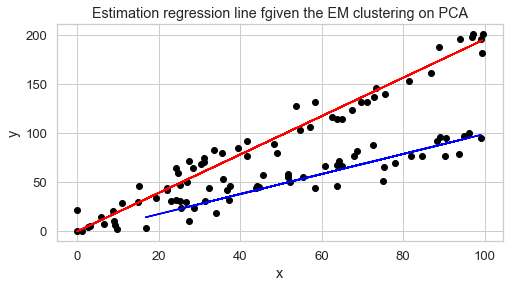

In [53]:
X1=data1[:,0]
m, b = np.polyfit(X1, y1, 1)
X2=data2[:,0]
m2, b2 = np.polyfit(X2, y2, 1)
figure=plt.figure(figsize=(8,4));
ax=plt.subplot(1,1,1);
ax.scatter(X[:,0],X[:,1],c='black')
ax.set_title('Estimation regression line fgiven the EM clustering on PCA')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.plot(X1, m*X1 + b,color='red')
ax.plot(X2, m2*X2 + b2,color='blue')
ax.grid()
ax.grid()

## Question A4-a

In [54]:
X2=tab2
from sklearn.cluster import KMeans
modkmeans=KMeans(n_clusters=2, random_state=0)
fitkmeans=modkmeans.fit(X2)
predX=fitkmeans.fit_predict(X2);

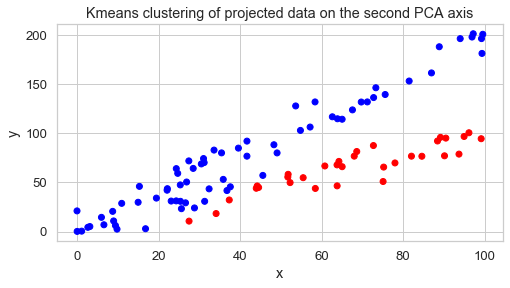

In [55]:
color = ['blue' if y==0 else 'red' for y in predX]
figure=plt.figure(figsize=(8,4));
ax=plt.subplot(1,1,1)
ax.scatter(X[:,0],X[:,1],c=color)
plt.grid()
ax.set_title('Kmeans clustering of projected data on the second PCA axis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid()

## Question A4-b
According to the very first scatter plot of the raw data, each class seems to follow a linear model
Thus i am going to do a linear regression to determine the linear model parameters for each class

In [56]:
#Separating the data
#I seprate the dataset into two dat according gto the class prediction i 
#obtained with the EM algorith 
# data1 corespnds to the data belonging to class 1 (predX==0)
data1=[]
data2=[]
for i in range (100):
    if(predX[i]==0):
         data1.append( X[i])
    else:
        data2.append( X[i])

In [57]:
data1=np.vstack( data1)
X1=data1[:,0].reshape((-1, 1))
y1=data1[:,1]
model = LinearRegression().fit(X1, y1)
print('intercept of class 1:', model.intercept_)
print('slope of class 1:', model.coef_)

intercept of class 1: -4.803156240278071
slope of class 1: [1.99696461]


## The final model for group 1 is 
$$Y=1.996*X- 4.8$$

In [58]:
data2=np.vstack( data2)
X2=data2[:,0].reshape((-1, 1))
y2=data2[:,1]
model = LinearRegression().fit(X2, y2)
print('interceptof class 2:', model.intercept_)
print('slope of class 2:', model.coef_)

interceptof class 2: -5.135233180845262
slope of class 2: [1.04431111]


## The final model for group 2 is 
$$Y=1.04*X- 5.1352$$

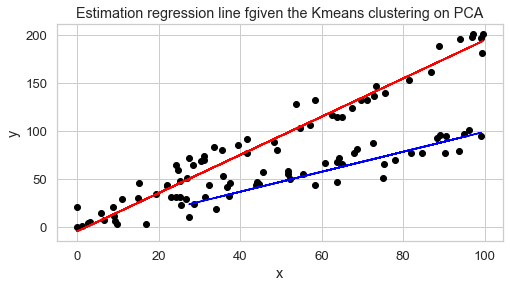

In [59]:
X1=data1[:,0]
m, b = np.polyfit(X1, y1, 1)
X2=data2[:,0]
m2, b2 = np.polyfit(X2, y2, 1)
figure=plt.figure(figsize=(8,4));
ax=plt.subplot(1,1,1);
ax.scatter(X[:,0],X[:,1],c='black')
ax.set_title('Estimation regression line fgiven the Kmeans clustering on PCA')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.plot(X1, m*X1 + b,color='red')
ax.plot(X2, m2*X2 + b2,color='blue')
ax.grid()
ax.grid()

## Question A5
The GMM and Kmeans algorithms gives close values the slope of linear models parametere but quite different values for the intercept.
however both models seems to to give the 2 intuitive clustes on could have made looking at the scatter plot of the raw data.

# I. B Clustering raw data

## Question B1
#####  A Gaussian Mixture Model tends to group the data points belonging to a single distribution together. here since each of  two clusters clusters can be modelled using a linear model if we apply GMM it will thus be able to separate the two distributions into two well defined clusters 

## Question B2
For this GMM I propose to  connsider the parameter slope and intercept of the classes.


## Question B3
For gaussian mixtures the EM Algorithm consist assuming that the observation follow a gaussisan distrubution the we compute the loglikelihood function which is going to be maximize in order to get the mean and the variance.
Here i do the following assumption

$$Y=\alpha X +\beta $$ so Y follow a linear distribution a I have to go from the parameter of the assumed  guassian distribution that I get from the EM algorithm to the parameters of the linear distribution I actually have 
 

In [60]:
from sklearn import mixture
X2=X
modgmm=mixture.GaussianMixture(n_components=2, covariance_type='tied');
fitgmm=modgmm.fit(X2);

predX=fitgmm.fit_predict(X2);

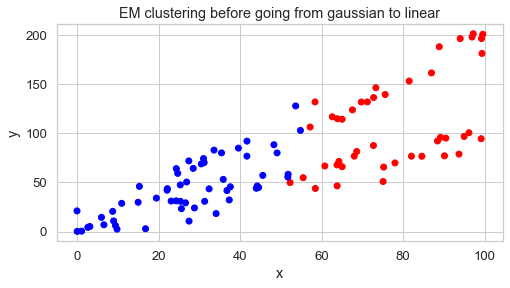

In [61]:
color = ['blue' if y==0 else 'red' for y in predX]
figure=plt.figure(figsize=(8,4));
ax=plt.subplot(1,1,1)
ax.scatter(X[:,0],X[:,1],c=color)
plt.grid()
ax.set_title('EM clustering before going from gaussian to linear')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid()

# Signals Representation

In [62]:
import csv
tabA=pd.read_csv("signalA.csv",header=1);
tabA=np.array(tabA);tabA=np.transpose(tabA[:,1:55]);
n1,p1=np.shape(tabA)
tabB=pd.read_csv("signalB.csv",header=1);
tabB=np.array(tabB);tabB=np.transpose(tabB[:,1:40]);
n2,p2=np.shape(tabB)

Text(0.5, 1.0, 'Bsignals')

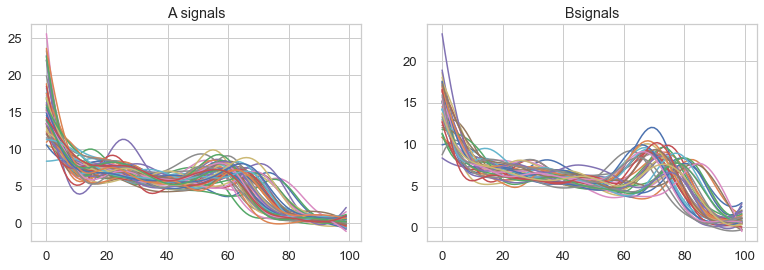

In [63]:
figure=plt.figure(figsize=(13,4));
ax=plt.subplot(1,2,1);
for i in range(n1):
    ax.plot(tabA[i])
ax.set_title('A signals')
ax=plt.subplot(1,2, 2);
for i in range(n2):
    ax.plot(tabB[i])
ax.set_title('Bsignals')

In [64]:
tabC=np.concatenate((tabA,tabB),axis=0)

The shape of the components are quite similar accoridn to the previous plot

## Question C1

In [65]:
print('mean tab A=',np.mean(tabA))
print('mean tab B=',np.mean(tabB))
print('mean tab C=',np.mean(tabC))

mean tab A= 5.3559260718340385
mean tab B= 6.048940071803842
mean tab C= 5.6465448460149235


Les moyennes ont la meme ordre de grandeur so we can assume they have the same mean pattern

# Question 2

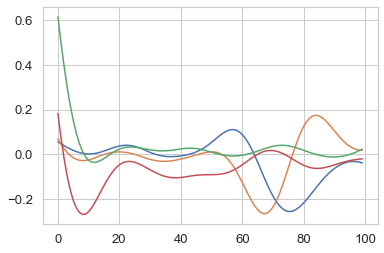

In [66]:

tab_centered= tabC - np.mean(tabC , axis = 0)
pca = PCA(n_components = 20).fit(tab_centered)
for i in range (4):
    plt.plot(pca.components_[i])

In [67]:
tabC.shape

(93, 100)

# Question 3 

In [68]:
variance = pca.explained_variance_ratio_ #calculate variance ratios

var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features

array([48.8, 67.2, 79.4, 85.7, 89.9, 93.3, 95.5, 97.2, 98.4, 99.1, 99.5,
       99.8, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9])

<BarContainer object of 20 artists>

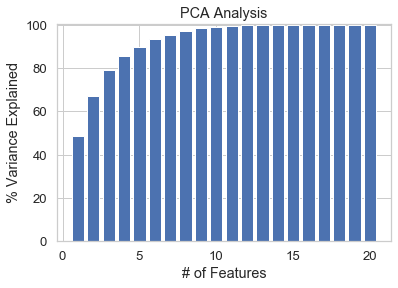

In [69]:
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(0,100.5)
plt.style.context('seaborn-whitegrid')


plt.bar(range(1,21),var)


On the previous plot we have the percentage of cumulaive explained variance 
### If we want to explain 85%  of the total variability in the data we have to take at least  the 4 firsy components 
### If we want to explain 95%  of the total variability in the data we have to take at least  the 7 first components 

In [70]:
tab1=np.zeros((93,100)) #en nant un seul eigen value
for i in range( 93):
    tab1[i,:]= np.mean(tabC , axis = 0)+np.vdot(tab_centered[i,:],pca.components_[0])*pca.components_[0]+np.vdot(tab_centered[i,:],pca.components_[1])*pca.components_[1]+np.vdot(tab_centered[i,:],pca.components_[2])*pca.components_[2]+np.vdot(tab_centered[i,:],pca.components_[3])*pca.components_[3]

Text(0.5, 1.0, 'signal reconstruit a partir des 4 premiers composantes')

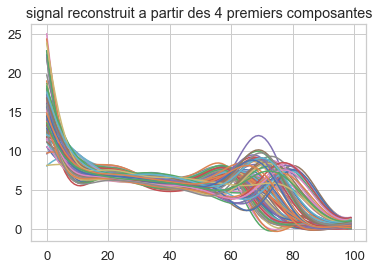

In [71]:
ax=plt.subplot(1,1, 1);
for i in range(93):
    ax.plot(tab1[i])
ax.set_title('signal reconstruit a partir des 4 premiers composantes')

Text(0.5, 1.0, 'signal reconstruit a partir des 4 premiers composantes')

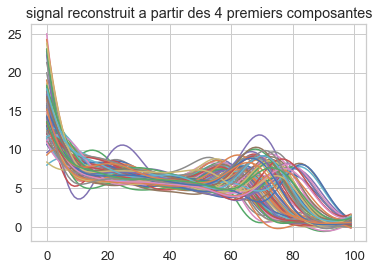

In [72]:
tab1=np.zeros((93,100)) #en nant un seul eigen value
for i in range( 93):
    tab1[i,:]= np.mean(tabC , axis = 0)+np.vdot(tab_centered[i,:],pca.components_[0])*pca.components_[0]+np.vdot(tab_centered[i,:],pca.components_[1])*pca.components_[1]+np.vdot(tab_centered[i,:],pca.components_[2])*pca.components_[2]+np.vdot(tab_centered[i,:],pca.components_[3])*pca.components_[3]+np.vdot(tab_centered[i,:],pca.components_[4])*pca.components_[4]+np.vdot(tab_centered[i,:],pca.components_[5])*pca.components_[5]+np.vdot(tab_centered[i,:],pca.components_[6])*pca.components_[6]
ax=plt.subplot(1,1, 1);
for i in range(93):
    ax.plot(tab1[i])
ax.set_title('signal reconstruit a partir des 4 premiers composantes')

On voit que les deux representation asont assez similiaire 